In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Number of sets
sets = 8

In [3]:
path = os.getcwd()

In [4]:
eac = pd.DataFrame()

for i in range(sets):
    path_file = os.path.join(path, f'Set{i+1}\\src\\eac_df_sparseness.xlsx')
    eacfile = pd.read_excel(path_file, index_col = [0])
    eac = pd.concat([eac, eacfile])

In [5]:
eac = eac.reset_index(drop = True)

In [6]:
eac

,0.80,0.60,0.40,0.20,0.01
0,3.753057,5.889952,5.761413,5.451772,11.587235
1,4.021469,4.013558,4.156020,5.902424,5.123656
2,5.306106,4.365374,3.892503,5.958926,7.950613
3,4.226456,4.933437,4.242851,4.737318,6.096158
4,3.547054,3.520387,6.557902,4.468454,8.104171
...,...,...,...,...,...
395,3.398608,2.961866,5.457564,5.842286,3.542174
396,3.610827,2.884281,4.107760,6.824483,4.749368
397,4.987721,4.599037,4.915578,4.356315,7.884659
398,3.364988,4.419403,6.018398,6.504907,5.922948


In [7]:
convergence_df = pd.DataFrame(columns = ['nos', 'median'])

for i in range(sets):
    head_rows = 50*(i+1)
    eac_filter = eac.head(head_rows)
    median1 = eac_filter[0.01].median()
    convergence_df.loc[i, 'nos']    = head_rows
    convergence_df.loc[i, 'median'] = median1


In [8]:
convergence_df

,nos,median
0,50,6.293976
1,100,5.928766
2,150,6.079775
3,200,6.200691
4,250,6.146212
5,300,6.36259
6,350,6.48123
7,400,6.494346


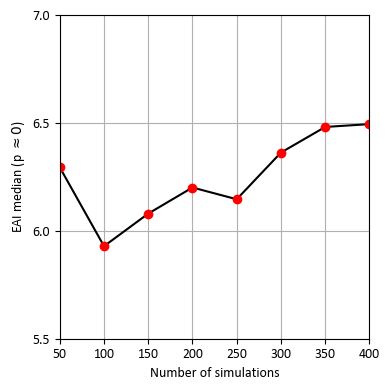

In [16]:
plt.figure(figsize=(4, 4))
df = convergence_df
plt.plot(df['nos'], df['median'], color='black', marker='o', linestyle='-', markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Number of simulations', fontsize=10, fontname='Calibri')
plt.ylabel(r'EAI median (p $\approx 0$)', fontsize=10, fontname='Calibri')
plt.xlim([50,400])
plt.ylim([5.5, 7])
plt.xticks(fontsize=10, fontname='Calibri')
plt.yticks(fontsize=10, fontname='Calibri')
plt.yticks(np.arange(5.5, 7.5, 0.5))
plt.grid(True)
plt.tight_layout()
plt.savefig('convergence.png', dpi = 300, bbox_inches = 'tight')
plt.show()